In [2]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud,STOPWORDS 
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup

from sklearn.metrics import recall_score, precision_score, f1_score

In [3]:
data = pd.read_csv('IMDB_Dataset.csv')

In [4]:
def clean_msg_no_html(message, stemmer=PorterStemmer(), 
                 stop_words=set(stopwords.words('english'))):
    
    # Remove HTML tags
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    
    # Converts to Lower Case and splits up the words
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            # filtered_words.append(stemmer.stem(word))
            filtered_words.append(word) 
    
    return filtered_words

In [5]:
vectorizer = CountVectorizer(stop_words='english')
all_features = vectorizer.fit_transform(data.review)
positive_reviews = data[data.sentiment == 1].review
negative_reviews = data[data.sentiment == 0].review

clean_positive_reviews = positive_reviews.apply(clean_msg_no_html)
clean_negative_reviews = negative_reviews.apply(clean_msg_no_html)

In [6]:
flat_positive_reviews = [item for sublist in clean_positive_reviews for item in sublist]
flat_negative_reviews = [item for sublist in clean_negative_reviews for item in sublist]

In [7]:
str_positive_reviews = ' '.join(flat_positive_reviews)
str_negative_reviews = ' '.join(flat_negative_reviews)

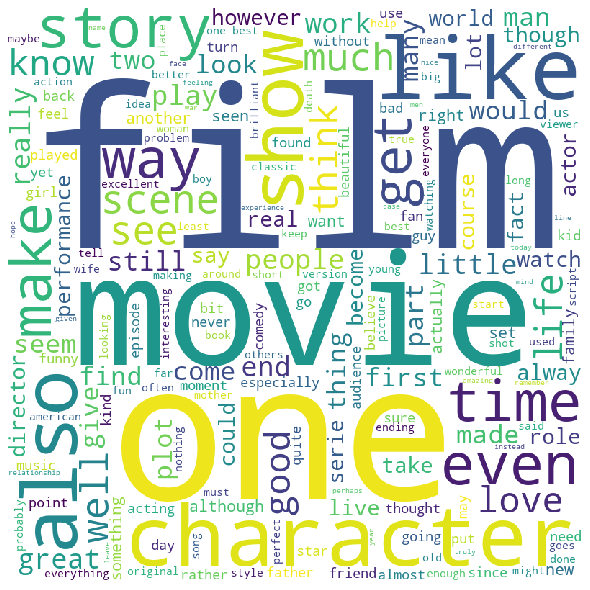

In [8]:
stop_words = set(stopwords.words("english"))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(str_positive_reviews) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

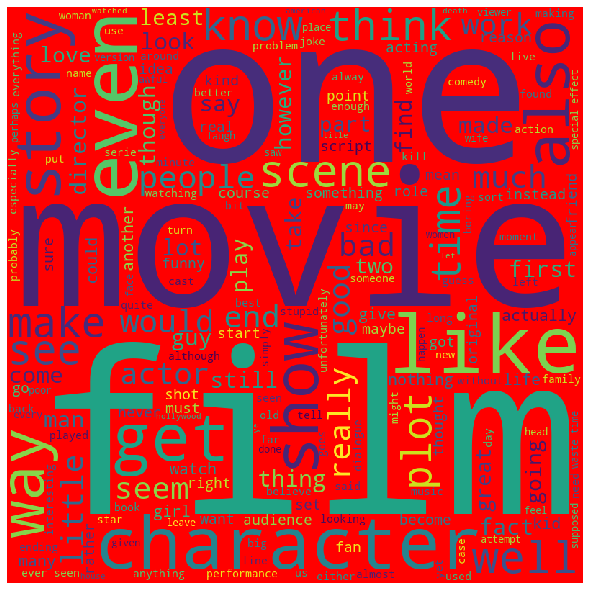

In [9]:
stop_words = set(stopwords.words("english"))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='red', 
                stopwords = stop_words, 
                min_font_size = 10).generate(str_negative_reviews) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [12]:
vectorizer.vocabulary_

{'reviewers': 75307,
 'mentioned': 57407,
 'watching': 97949,
 'just': 48334,
 'oz': 65272,
 'episode': 30033,
 'll': 53078,
 'hooked': 42725,
 'right': 75711,
 'exactly': 30888,
 'happened': 40335,
 'br': 11989,
 'thing': 90149,
 'struck': 86368,
 'brutality': 12922,
 'unflinching': 94350,
 'scenes': 78541,
 'violence': 96866,
 'set': 80101,
 'word': 99790,
 'trust': 92697,
 'faint': 31830,
 'hearted': 41057,
 'timid': 90720,
 'pulls': 71391,
 'punches': 71438,
 'regards': 73904,
 'drugs': 27374,
 'sex': 80196,
 'hardcore': 40397,
 'classic': 17478,
 'use': 95543,
 'called': 14048,
 'nickname': 62053,
 'given': 37368,
 'oswald': 64572,
 'maximum': 56385,
 'security': 79484,
 'state': 85330,
 'penitentary': 66873,
 'focuses': 34150,
 'mainly': 54835,
 'emerald': 29180,
 'city': 17324,
 'experimental': 31282,
 'section': 79463,
 'prison': 70404,
 'cells': 15522,
 'glass': 37444,
 'fronts': 35325,
 'face': 31709,
 'inwards': 46429,
 'privacy': 70420,
 'high': 41839,
 'agenda': 3017,
 'em

In [13]:
X_train, X_test, y_train, y_test = train_test_split(all_features, data.review, 
                                                   test_size=0.3, random_state=88)

In [22]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MemoryError: Unable to allocate array with shape (35000, 34795) and data type int32

In [24]:
nr_correct = (y_test == classifier.predict(X_test)).sum()
print(f'{nr_correct} documents classfied correctly')

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
nr_incorrect = y_test.size - nr_correct
print(f'Number of documents incorrectly classified is {nr_incorrect}')

In [ ]:
classifier.score(X_test, y_test)
f1_score(y_test, classifier.predict(X_test))

In [ ]:
example = ['get viagra for free now!', 
          'need a mortgage? Reply to arrange a call with a specialist and get a quote', 
          'Could you please help me with the project for tomorrow?', 
          'Hello Jonathan, how about a game of golf tomorrow?', 
          'Ski jumping is a winter sport in which competitors aim to achieve the longest jump after descending from a specially designed ramp on their skis. Along with jump length, competitor\'s style and other factors affect the final score. Ski jumping was first contested in Norway in the late 19th century, and later spread through Europe and North America in the early 20th century. Along with cross-country skiing, it constitutes the traditional group of Nordic skiing disciplines.'
          ]

In [ ]:
doc_term_matrix = vectorizer.transform(example)

In [ ]:
classifier.predict(doc_term_matrix)